# Image Net

In [1]:
! tree -d /home/opc/cats_dogs/

/home/opc/cats_dogs/
|-- test1
|-- train
|   |-- cats
|   `-- dogs
`-- validation
    |-- cats
    `-- dogs

7 directories


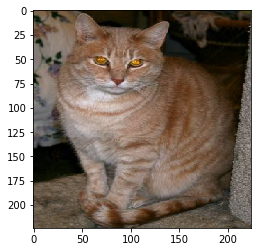

In [14]:
img_path='/home/opc/cats_dogs/train/cats/cat.10020.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.0
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [2]:
import os
base_dir='/home/opc/cats_dogs'
train_dir=os.path.join(base_dir, 'train')
validation_dir=os.path.join(base_dir, 'validation')
#test_dir=os.path.join(base_dir, 'test1')

In [3]:
from keras.applications import VGG16
conv_base = VGG16(
    weights='imagenet',
    input_shape=(224,224,3),
    include_top=False
)

Using TensorFlow backend.


In [4]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
from keras import models, layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


In [6]:
len(model.trainable_weights)



30

In [7]:
conv_base.trainable = False
len(model.trainable_weights)

4

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# validation set not enhanced for transformed data
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=20,
    class_mode='binary'
)

Found 22334 images belonging to 2 classes.
Found 2666 images belonging to 2 classes.


In [9]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['accuracy']
    )
    

In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 29s 286ms/step - loss: 0.5559 - accuracy: 0.7115 - val_loss: 0.3162 - val_accuracy: 0.8660
Epoch 2/30
100/100 [==============================] - 26s 255ms/step - loss: 0.4162 - accuracy: 0.8180 - val_loss: 0.3002 - val_accuracy: 0.8820
Epoch 3/30
100/100 [==============================] - 26s 258ms/step - loss: 0.3719 - accuracy: 0.8365 - val_loss: 0.2963 - val_accuracy: 0.8884
Epoch 4/30
100/100 [==============================] - 26s 256ms/step - loss: 0.3515 - accuracy: 0.8501 - val_loss: 0.1570 - val_accuracy: 0.9100
Epoch 5/30
100/100 [==============================] - 26s 256ms/step - loss: 0.3359 - accuracy: 0.8520 - val_loss: 0.0881 - val_accuracy: 0.9010
Epoch 6/30
100/100 [==============================] - 26s 259ms/step - loss: 0.3200 - accuracy: 0.8610 - val_loss: 0.3759 - val_accuracy: 0.8986
Epoch 7/30
100/100 [==============================] - 25s 252ms/step - loss: 0.3242 - accuracy: 0.8580 - val_loss: 0.1233 - val_ac

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

<Figure size 432x288 with 0 Axes>

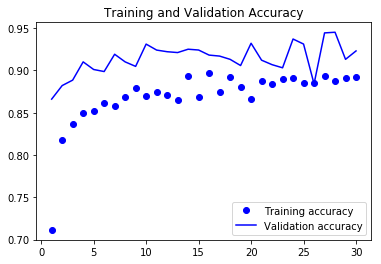

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

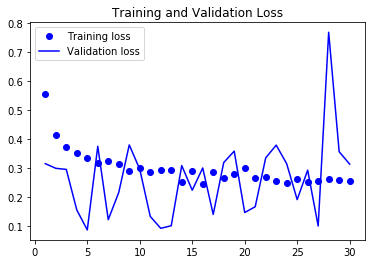

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.figure()

In [36]:
from keras.models import load_model, save_model
save_model(model, 'cats_and_dogs.h5')

m = load_model('cats_and_dogs.h5')
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


/root/venvs/tensorflow/lib/python2.7/site-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


[<tf.Tensor 'block1_conv1/Relu:0' shape=(None, 224, 224, 64) dtype=float32>, <tf.Tensor 'block1_conv2/Relu:0' shape=(None, 224, 224, 64) dtype=float32>, <tf.Tensor 'block1_pool/MaxPool:0' shape=(None, 112, 112, 64) dtype=float32>, <tf.Tensor 'block2_conv1/Relu:0' shape=(None, 112, 112, 128) dtype=float32>, <tf.Tensor 'block2_conv2/Relu:0' shape=(None, 112, 112, 128) dtype=float32>, <tf.Tensor 'block2_pool/MaxPool:0' shape=(None, 56, 56, 128) dtype=float32>, <tf.Tensor 'block3_conv1/Relu:0' shape=(None, 56, 56, 256) dtype=float32>]
Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)

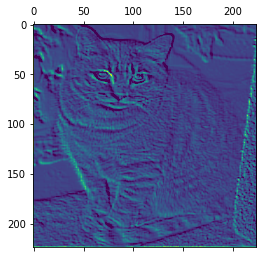

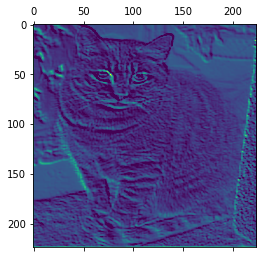

In [52]:
from keras import models

vgg16 = model.layers[0]

outputs=[]
model_input=None
for i in range(1,8):
    layer = vgg16.get_layer(index=i)
    print(layer)
    if i==1:
        model_input = layer.input
    out = layer.output
    outputs.append(out)
    
print(outputs)


#print(model.layers[:8])

activation_model = models.Model(inputs=model_input, outputs=outputs)

activation_model.summary()


activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')